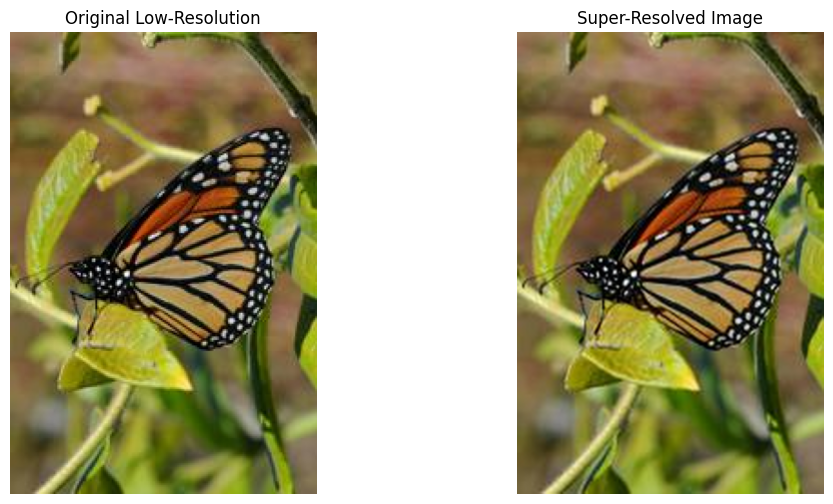

In [4]:
import numpy as np
from skimage import io, transform
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

low_res_path = 'test.jpg'
low_res_img = io.imread(low_res_path)

scaling_factor = 8
high_res_initial = np.zeros((low_res_img.shape[0] * scaling_factor, low_res_img.shape[1] * scaling_factor, 3))
for c in range(3):
    high_res_initial[..., c] = transform.resize(low_res_img[..., c],
                                                (low_res_img.shape[0] * scaling_factor, low_res_img.shape[1] * scaling_factor),
                                                order=3)

lambda_reg = 0.1
rho = 1.0
n_iter = 30
x = high_res_initial.copy()
z = x.copy()
u = np.zeros_like(x)


for i in range(n_iter):
    for c in range(3):

        x[..., c] = (high_res_initial[..., c] + rho * (z[..., c] - u[..., c])) / (1 + rho)

        z[..., c] = denoise_tv_chambolle(x[..., c] + u[..., c], weight=lambda_reg / rho, max_num_iter=5)

        u[..., c] = u[..., c] + x[..., c] - z[..., c]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Low-Resolution")
plt.imshow(low_res_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Super-Resolved Image")
plt.imshow(z)
plt.axis('off')
plt.show()
